# Support Vector Machines (SVM) - Hard Margin Case
---
Recall the binary classification problem that SVMs try to solve. The hard margin SVM finds the seperating decision bounary with the largest margin. 

<img src="MaxMargin.jpg" height="400" width="400">

In this assigment, you will write the code to find the maximum margin for the hard margin case.

We showed in class that we could solve this problem  by reducing it to the problem of solving a quadratic programming problem (QP).  There are many solvers for quadratic programming problems. We will use the *Convex Optimization Library*, [CVXOPT](https://cvxopt.org/userguide/coneprog.html#quadratic-programming); a free software package that works well with Python and numpy. 
You will need to install [CVXOPT](https://cvxopt.org/install/)

In CVXOPT, the quadratic programming problem solver, <b><i>cvxopt.solvers.qp</i></b>,  solves the following problem:

$$\begin{eqnarray} \min_{x}\frac{1}{2} x^{T}Px - q^{T}x \nonumber \\\ \textrm{s.t.}\quad Gx \preceq h \\\ \textrm{and}\quad Ax = b \end{eqnarray}$$

 Note that $ Gx \preceq h $ is taken elementwise. 

The solver's (simplified) API is `cvxopt.solvers.qp(P, q, G, h, A, b)` 
where only $P$ and $q$ are required. 

You will need to match the solver's API.

The solver's argument's type must be CVXOPT matrices. I suggest you first create the arguments as NumpPy arrays and matrices and then convert them to CVXOPT matrices (For example, first import the library: `from cvxopt import matrix` then convert a NumPy matrix `P` to a CVXOPT matrix using ` P = matrix(P)`)

What is return by the solver  is a Python dictionary.  If you save the return value in a variable called `sol` (i.e. `sol = solvers.qp(...)`), you can access to the solution of the quadratic programming problem by typing `sol["x"]`.


# Hard Margin Case

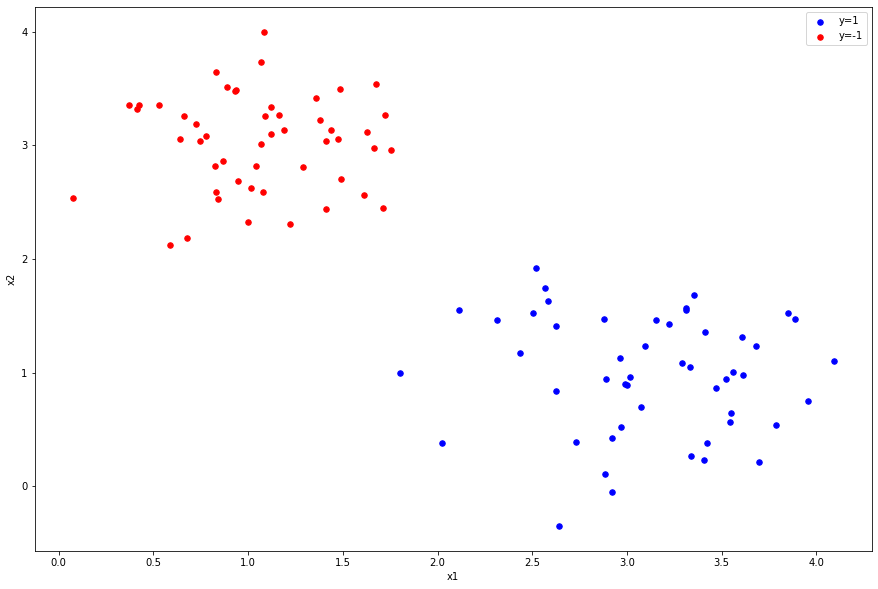

In [2]:
import numpy as np
import csv
from numpy import genfromtxt
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
import cvxopt
%matplotlib inline

plt.figure(figsize = (15,10))

# Use numpy function genfromtxt(…, delimiter=…) to load from files.
# Store the data from “X.csv” to X and target from “y.csv” to y
x = np.genfromtxt("X.csv", delimiter=",")
y = np.genfromtxt("y.csv", delimiter=",")

# Use np.where to find all index of data which y=1 and store them to idx_1
# same as y=-1, store them to idx_2
idx_1 = np.where(y == 1)
idx_2 = np.where(y == -1)

# make the plot use plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='b', marker="o")
plt.scatter(x[idx_1,0],x[idx_1,1], s=30, c='b',marker = "o", label="y=1")
plt.scatter(x[idx_2,0],x[idx_2,1], s=30, c='r',marker = "o", label="y=-1")

# Set the x label with x1 and y label with x2
plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().legend() #to add the legend area
plt.show()


## SVM Primal  Problem
---
### Problem 1.1
![qp.png](attachment:qp.png)
You will now use the quadratic problem solver to find the maximum margin for the SVM primal problem:

$$\begin{eqnarray}\left.\begin{aligned}  
&\min_{w}\frac{1}{2}||w||^{2} & \nonumber \\\ 
&\textrm{s.t.}  \quad y^{(i)}(w^{T}{\bf x}^{(i)} + w_0) \ge 1 \quad \forall i \end{aligned}\right.\end{eqnarray}$$


Look back at the lecture notes for the primal problem.  Please note that the variable names used in the lecture are different from the variable names given to decribe the API for CVXOPT's quadratic problem solver.


In [3]:
def linear_svm(X,y):
    solvers.options['show_progress'] = False
    
    N = x.shape[0]
    F = x.shape[1]

#     create the Identity matrix using np.diag and np.ones
    Identity = np.diag(np.ones(F+1),0)

#     create the Q matrix using np.zeros
    Q = np.zeros((F+1, F+1))

    for row in range(Q.shape[0]):
        for col in range(Q.shape[1]):
            if row==0 or col==0:
                Q[row,col] = 0
            else:
                Identity[row-1, col-1] = Q[row,col]

    p = cvxopt.matrix(Q)
    q = cvxopt.matrix(np.zeros(F+1))

    emptyList = []

    for n in range(N):
        zeroM = np.zeros((F+1))
        for index,value in enumerate(zeroM):
            if index == 0:
                zeroM[index] = 1
            else:
                zeroM[index] = x[n].T[index-1]
        emptyList.append(y[n]*zeroM)


    emptyListArr = np.asarray(emptyList)*(-1)
    G = cvxopt.matrix(emptyListArr)
    h = cvxopt.matrix(np.ones(N)*(-1))
    sol = cvxopt.solvers.qp(p, q, G, h)
    ws = np.array(sol["x"])
    return sol, ws

# fit svm classifier
sol, ws = linear_svm(x,y)
# print the weights
print("W values:", ws[0], ws[1], ws[2])
print("Solution values:",sol)

W values: [0.59202931] [1.49553543] [-1.71995786]
Solution values: {'x': <3x1 matrix, tc='d'>, 'y': <0x1 matrix, tc='d'>, 's': <100x1 matrix, tc='d'>, 'z': <100x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 3.4905111485104e-08, 'relative gap': None, 'primal objective': 0.0, 'dual objective': -3.4905111469378443e-08, 'primal infeasibility': 3.1121981729577045e-10, 'dual infeasibility': 3.757667014021734e-08, 'primal slack': 0.06412883271386502, 'dual slack': 1.6928251131179118e-11, 'iterations': 6}


### Plotting the  decision boundary

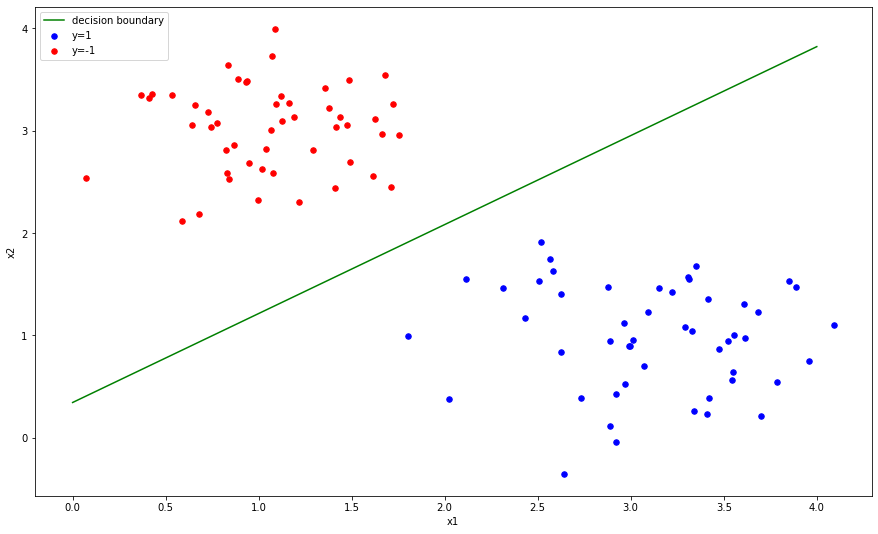

In [4]:
def plot_data_with_decision_boundary(x, y, ws, fig_size=(15, 9), labels=['x1', 'x2']):
    # plot the dataset
    plt.figure(figsize = (fig_size))
    
    # find the slope and intercept of the decision boundary
    decisionBoundarySlope = -ws[1]/ws[2]
    decisionBoundaryIntercept = -ws[0]/ws[2]
    
    # ploting the data
    idx_1 = np.where(y == 1)
    idx_2 = np.where(y == -1)
    
    plt.scatter(x[idx_1,0],x[idx_1,1], s=30, c='b',marker = "o", label="y=1")
    plt.scatter(x[idx_2,0],x[idx_2,1], s=30, c='r',marker = "o", label="y=-1")
    
    x=np.arange(0,5)
    
    y = x*decisionBoundarySlope + decisionBoundaryIntercept
    
    plt.plot(x, y, "g", label="decision boundary")

    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.gca().legend()


# plotting the points and decision boundary using the above function   
plot_data_with_decision_boundary(x, y, ws, (15,9), labels=["x1", "x2"])


Determine which points are closest to the decision boundary. What is the functional margin of the points closest to the decision boundary?   

In [5]:
# calculate distance from each point to the decision boundary
# find the nearest data points and its index.
def distance(x):
    decisionBoundarySlope = -ws[1]/ws[2]
    decisionBoundaryIntercept = -ws[0]/ws[2]
    
    ptA = 2*decisionBoundarySlope + decisionBoundaryIntercept
    ptB = 3*decisionBoundarySlope + decisionBoundaryIntercept
    
    ptA,ptB = np.array([2, ptA[0]]),np.array([3,ptB[0]])
    distance = np.linalg.norm(np.cross(ptB-ptA,ptA-x))/np.linalg.norm(ptB-ptA)
    
    return distance

distances = []

for i in range(x.shape[0]):
    distances.append([distance(x[i]),x[i],i])
    
print("The points closest to the decision boundary:\n")
print("Point:", distances[0][1]," Distance:", distances[0][0])
print("Point:", distances[1][1]," Distance:", distances[1][0])
print("Point:", distances[2][1]," Distance:", distances[2][0])
print("Point:", distances[3][1]," Distance:", distances[3][0])
print("Point:", distances[4][1]," Distance:", distances[4][0])


The points closest to the decision boundary:

Point: [3.78621561 0.53994071]  Distance: 2.336656590740867
Point: [2.96251929 1.12478175]  Distance: 1.3548466277856888
Point: [3.22099949 1.4234713 ]  Distance: 1.299052686346015
Point: [3.01345462 0.95777053]  Distance: 1.5142987863008563
Point: [3.09256019 1.23165683]  Distance: 1.359523713075793


Write the decision function $f_{\texttt{primal}}({\bf x})$ to predict examples.  Use this function to predict the label of $(3.0, 1.5)^T$ and $(1.2, 3.0)^T$

Prediction for (3.0, 1.5): 1
Prediction for (1.2, 3.0): -1


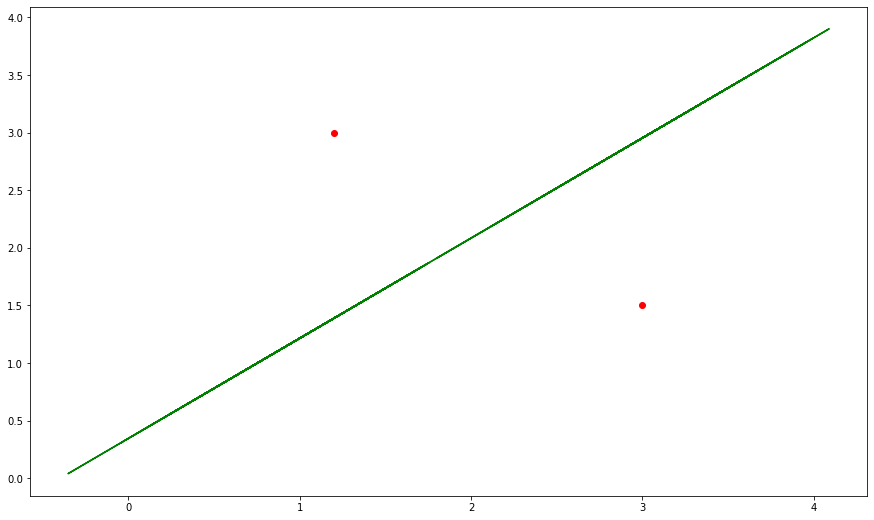

In [21]:
def f_primal(x): 
    # return the predicted value using svm primal
    wCoeff = [ws[1], ws[2]]
    b1 = ws[2]
    y1 = np.dot(x, wCoeff) + b1
    
    if y1>0:
        return 1
    else:
        return -1
    
# using f_ primal() to predict (3.0, 1.5) and (1.2, 3.0) and plot the figure.
fPrimal1 = f_primal((3.0, 1.5))
fPrimal2 = f_primal((1.2, 3.0))

print("Prediction for (3.0, 1.5):", fPrimal1)
print("Prediction for (1.2, 3.0):", fPrimal2)

plt.figure(figsize = (15, 9))
    
decisionBoundarySlope = -ws[1]/ws[2]
decisionBoundaryIntercept = -ws[0]/ws[2]
y = x*decisionBoundarySlope + decisionBoundaryIntercept
plt.plot(x, y, "g", label="decision boundary")
plt.plot(3.0, 1.5, 'ro',label='Point A')
plt.plot(1.2, 3.0,'ro',label='Point A')

plt.show()
